In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 추론 통계

<details><summary>추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법
</summary>

- 모집단/표본
- 확률변수
- 확률분포
- 표본분포
- 추정/검정

## CHAP 6. 대표적인 이산형 확률분포

- 5장

- 6장

- 추정통계

- 모집단에 대한 가정

- **비모수적** 기법

- **모수적** 기법

- 다양한 확률분포

- 파이썬 구현

- NumPy

- SciPy의 stats 모듈

- 라이브러리 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 소수점 이하 3자리까지 출력
%precision 3
np.set_printoptions(precision=3, suppress=True)

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

- E(X)와 V(X)

- check_prob()

- plot_prob()

In [ ]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=(lambda x: x)):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=(lambda x: x)):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='red')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()

### 6-1. 베르누이 분포

- 가장 기본적인 이산형 확률분포

- 0과 1

- 베르누이 시행

- 1이 나오면 성공, 0이 나오면 실패

- 1이 나오는 확률 $p$, 0이 나오는 확률 $1-p$

- 유일한 파라미터

- $0\le{p}\le1$

- $Bern(p)$


> **베르누이 분포의 확률함수**

> $$
> f(x) =
> \begin{cases}
> p^x (1-p)^{(1-x)} & (x \in \{0,1\}) \\\\
> 0 & (otherwise)
> \end{cases}
> \tag{6-1}
> $$

- 1을 대입하면 $p$, 0을 대입하면 $1-p$

- 값이 두 개면 모두 베르누이 분포

- 구체적인 예

- **동전을 던져 앞면이 나올 확률** $∼Bern(\frac{1}{2})$

$$
P(X=1) = \left(\frac{1}{2}\right)^1 × \left(1-\frac{1}{2}\right)^{(1-1)} = \frac{1}{2}
$$

- **주사위를 한 번 굴려 6이 나오지 않을 확률** $∼Bern(\frac{1}{6})$


$$
P(X=0) = \left(\frac{1}{6}\right)^0 × \left(1-\frac{1}{6}\right)^{(1-0)} = \frac{5}{6}
$$

- 기대값과 분산

- 5-1절의 식

> **베르누이 분포의 기대값과 분산**

> $X ∼ Bern(p)$라고 할 때<br><br>
>
> $$
E(X) = p, \quad V(X) = p(1-p)
\tag{6-2}
$$

- NumPy 구현

In [ ]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

- $X ∼ Bern(0.3)$

In [ ]:
p = 0.3
X = Bern(p)

- 기대값 $=0.3$ &nbsp; / &nbsp; 분산 $=0.3×0.7=0.21$

In [ ]:
check_prob(X)

expected value 0.3
variance 0.21


- 시각화

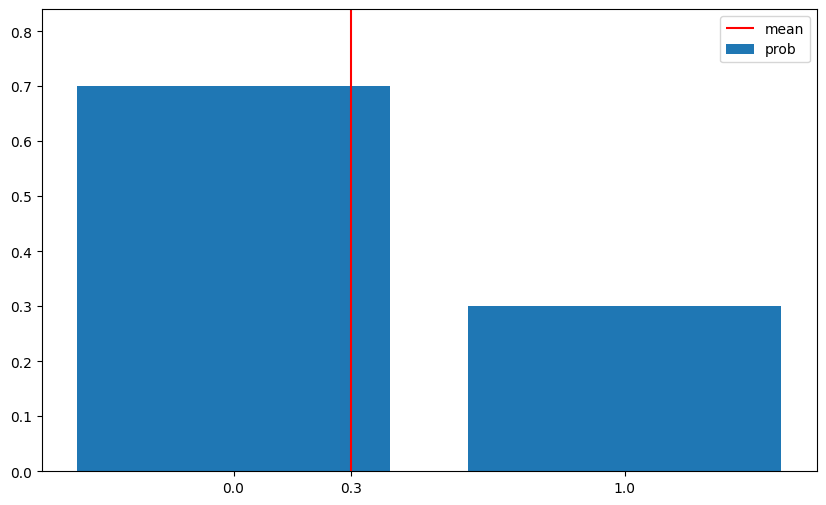

[그림 6-1] 베르누이 분포


In [ ]:
plot_prob(X)
print('[그림 6-1] 베르누이 분포')

- bernoulli()

- 인자 $p$ / rv_frozen object 반환

- 다양한 메서드

In [ ]:
rv = stats.bernoulli(p)

- pmf() 메서드

In [ ]:
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

- 리스트 인자

In [ ]:
rv.pmf([0, 1])

array([0.7, 0.3])

- cdf() 메서드

In [ ]:
rv.cdf([0, 1])

array([0.7, 1. ])

- mean() 메서드 / var() 메서드

In [ ]:
rv.mean(), rv.var()

(0.3, 0.21)

- 여기까지가 기본적인 방법

- 베르누이 분포 정리

[표 6-1]

|베르누이 분포의 정리||
|:-:|:-:|
|파라미터|$p$|
|취할 수 있는 값|$\{0,1\}$|
|확률함수|$p^x (1-p)^{(1-x)}$|
|기대값|$p$|
|분산|$p(1-p)$|
|scipy.stats|$\text{bernoulli}(p)$|

### 6-2. 이항분포

- **이항분포**(binomial distribution)

- $\{0, 1, ⋯, n\}$

- 파라미터 $p$, $n$

- $0≤p≤1$

- $1 ≤ n$ 정수

- $B(n,p)$

- 확률함수

- $_nC_x=\cfrac{n!}{x!(n-x)!}$

> **이항분포의 확률함수**

> $$
> f(x) =
> \begin{cases}
> _nC_x \, p^x (1-p)^{(n-x)} & (x \in \{0,1,⋯,n\}) \\\\
> 0 & (otherwise)
> \end{cases}
> \tag{6-3}
> $$

- 구체적인 예

- **동전을 10번 던져 앞면이 나올 확률** $∼B(10,\frac{1}{2})$

$$
P(X=3) = {}_{10}C_3 \left(\frac{1}{2}\right)^3 \left(1 - \frac{1}{2}\right)^{(10-3)} = \frac{15}{128}
$$

- **주사위를 4번 굴려 6이 나올 확률** $∼B(4,\frac{1}{6})$

$$
P(X=0) = {}_{4}C_0 \left(\frac{1}{6}\right)^0 \left(1 - \frac{1}{6}\right)^{(4-0)} = \frac{625}{1296}
$$

> **이항분포의 기대값과 분산**

> $X ∼ B(n,p)$라고 할 때<br><br>
>
> $$
E(X) = np, \quad V(X) = np(1-p)
\tag{6-4}
$$

- NumPy 구현 / comb() 함수

In [ ]:
from scipy.special import comb

def B(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

- $X ∼ B(10,0.3)$

In [ ]:
n = 10
p = 0.3
X = B(n, p)

- 기대값 $=10×0.3=3$ / 분산 $=10×0.3×0.7 = 2.1$

In [ ]:
check_prob(X)

expected value 3.0
variance 2.1


- 시각화

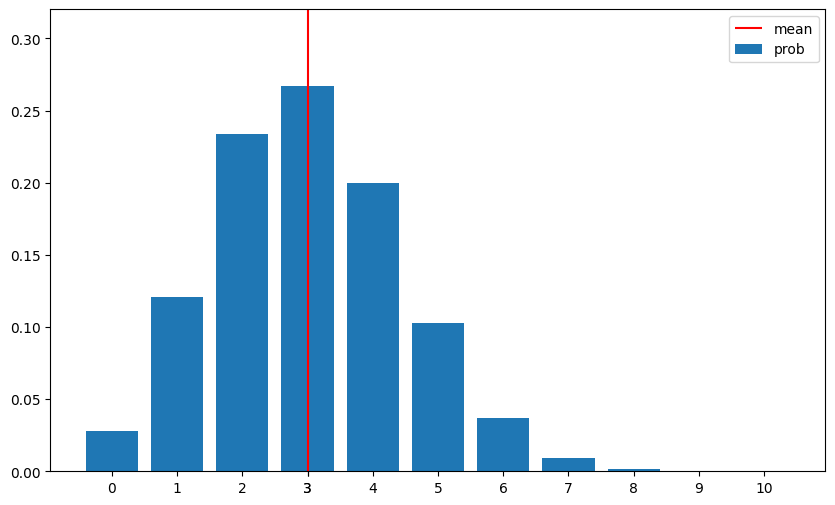

[그림 6-2] 이항분포


In [ ]:
plot_prob(X)
print('[그림 6-2] 이항분포')

- binom()

- $n=10$ / $p=0.3,\;0.5,\;0.7$

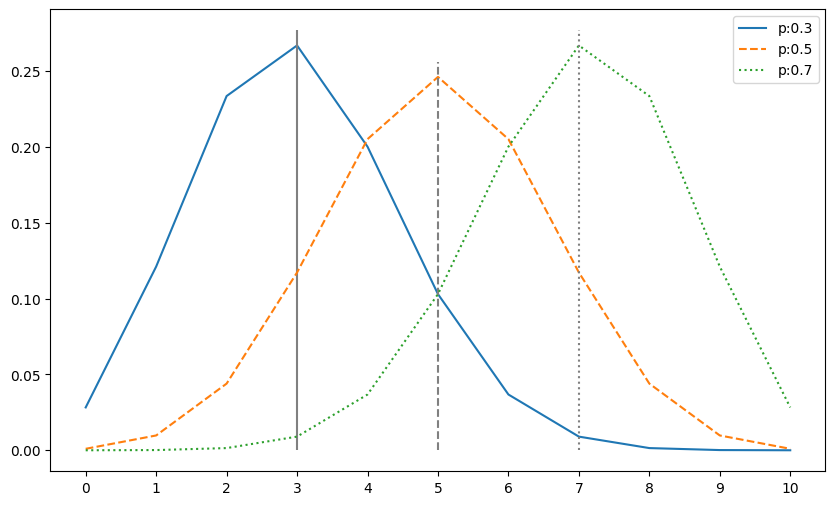

[그림 6-3] 다양한 이항분포 (n = 10, p = [0.3, 0.5, 0.7])


In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

n = 10
x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls)
    ax.vlines(n*p, 0, rv.pmf(x_set).max()+0.01,
              ls=ls, color='grey')
ax.set_xticks(x_set)
ax.legend()

plt.show()
print('[그림 6-3] 다양한 이항분포 (n = 10, p = [0.3, 0.5, 0.7])')

- $p$가 커지면

- 대칭성

- $p=0.3$ / $n=10,\;30,\;50$

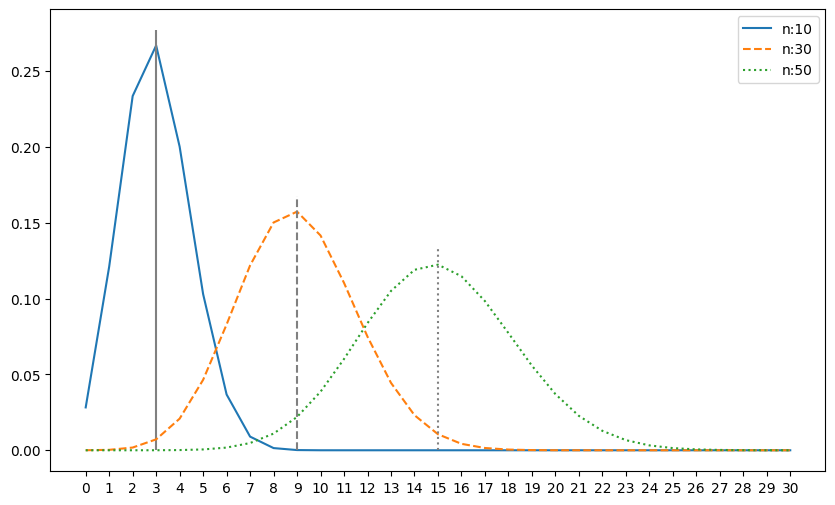

[그림 6-4] 다양한 이항분포 (n = [10, 30, 50], p = 0.3)


In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

p = 0.3
ns = [10, 30, 50]
x_set = np.arange(np.max(ns)/2+6)
for n, ls in zip(ns, linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'n:{n}', ls=ls)
    ax.vlines(n*p, 0, rv.pmf(x_set).max()+0.01,
              ls=ls, color='grey')
ax.set_xticks(x_set)
ax.legend()

plt.show()
print('[그림 6-4] 다양한 이항분포 (n = [10, 30, 50], p = 0.3)')

- $n$이 커지면

- 대칭 / 부드러운

- 이항분포 정리

[표 6-2]

|이항분포의 정리||
|:-:|:-:|
|파라미터|$n,\,p$|
|취할 수 있는 값|$\{0,1,\cdots,n\}$|
|확률함수|$_nC_x p^x (1-p)^{(n-x)}$|
|기대값|$np$|
|분산|$np(1-p)$|
|scipy.stats|$\text{binom}(n,p)$|

### 6-3. 기하분포

- **기하분포**(geometric distribution)

- $\{1,2,3,⋯\}$

- 파라미터 $p$

- $0≤p≤1$

- $G(p)$

- 확률함수

> **기하분포의 확률함수**

> $$
> f(x) =
> \begin{cases}
> (1-p)^{(x-1)} p & (x \in \{0,1,2,3,⋯\}) \\\\
> 0 & (otherwise)
> \end{cases}
> \tag{6-5}
> $$

- 구체적인 예

- **앞면이 나올 때까지 동전을 던지는 횟수** $∼ G(\frac{1}{2})$

$$
P(X=5) = \left(1 - \frac{1}{2}\right)^{(5-1)} × \frac{1}{2} = \frac{1}{32}
$$

- **6이 나올 때까지 주사위를 굴린 횟수** $∼G(\frac{1}{6})$

$$
P(X=3) = \left(1 - \frac{1}{6}\right)^{(3-1)} × \frac{1}{6} = \frac{25}{216}
$$

> **기하분포의 기대값과 분산**

> $X ∼ G(p)$라고 할 때<br><br>
>
> $$
E(X) = \frac{1}{p}, \quad V(X) = \frac{1-p}{p^2}
\tag{6-6}
$$

- NumPy 구현 (x_set : 1 ~ 29)

In [ ]:
def G(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p)**(x-1)
        else:
            return 0
    return x_set, f

- $X ∼ G(\frac{1}{2})$

In [ ]:
p = 0.5
X = G(p)

- 기대값 $=\frac{1}{1/2}=2$ / 분산 = $\frac{1-1/2}{(1/2)^2}=2$

In [ ]:
check_prob(X)

expected value 2.0
variance 2.0


- 시각화

- 11 이상 확인 불가

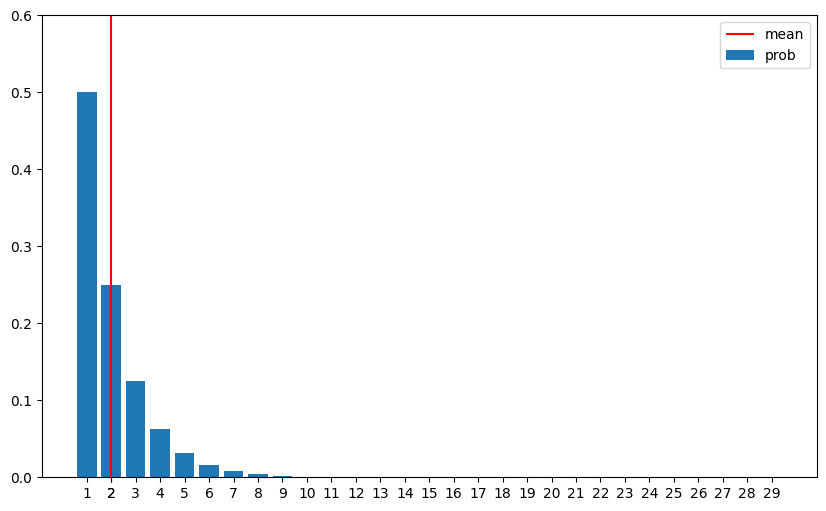

[그림 6-5] 기하분포


In [ ]:
plot_prob(X)
print('[그림 6-5] 기하분포')

- geom()

- $p=0.2,\;0.5,\;0.8$ &nbsp; (x_set : 1 ~ 14)

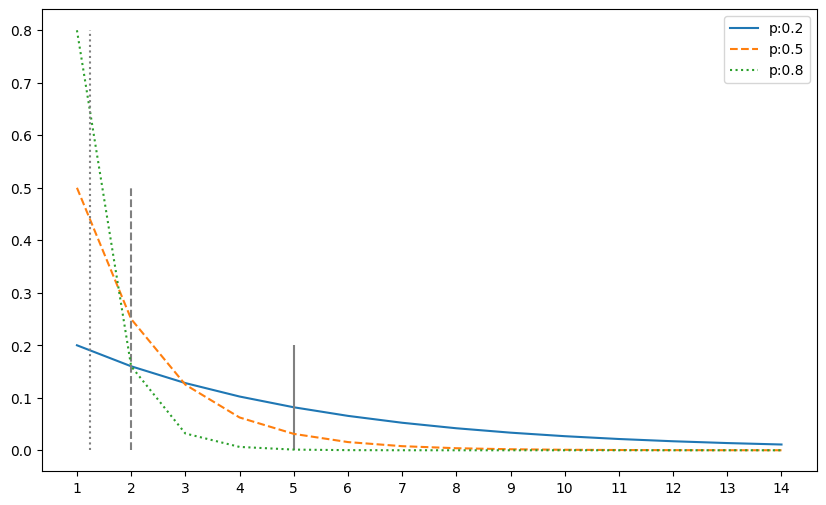

[그림 6-6] 다양한 기하분포 (p = [0.2, 0.5, 0.8])


In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls)
    ax.vlines(1/p, 0, rv.pmf(x_set).max(),
              ls=ls, color='grey')
ax.set_xticks(x_set)
ax.legend()

plt.show()
print('[그림 6-6] 다양한 기하분포 (p = [0.2, 0.5, 0.8])')

- 지수적 감소

- 기하분포 정리

[표 6-3]

|기하분포의 정리||
|:-:|:-:|
|파라미터|$p$|
|취할 수 있는 값|$\{0,1,2,3,\cdots\}$|
|확률함수|$(1-p)^{(x-1)}p$|
|기대값|$\frac{1}{p}$|
|분산|$\frac{1-p}{p^2}$|
|scipy.stats|$\text{geom}(p)$|

### 6-4. 포아송분포

- **포아송 분포**(Poisson distribution)

- $\{0,1,2,⋯\}$

- 파라미터는 $λ$

- $Poi(λ)$

- 확률함수

> **포아송 분포의 확률함수**

> $$
> f(x) =
> \begin{cases}
> \cfrac{λ^x}{x!} \, e^{-λ} & (x \in \{0,1,2,3,⋯\}) \\\\
> 0 & (otherwise)
> \end{cases}
> \tag{6-7}
> $$

- 구체적인 예

- **하루에 평균 2건의 교통사고가 발생하는 지역에서,<br>하루 교통사고 발생 건수** $∼Poi(2)$

$$P
(X=0) = \frac{2^0}{0!} \, e^{-2} ≃ 0.135
$$

- **한 시간에 평균 10번 액세스하는 사이트에 대한<br>한 시간당 액세스 건수** $∼Poi(10)$

$$
P(X=15) = \frac{10^{15}}{15!} \, e^{-10} ≃ 0.035
$$

> **포아송 분포의 기대값과 분산**

> $X ∼ Poi(λ)$라고 할 때<br><br>
>
> $$
E(X) = λ, \quad V(X) = λ
\tag{6-8}
$$

- NumPy 구현 / factorial() 함수 / x_set : 0 ~ 19

In [ ]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

- $X ∼ Poi(3)$

In [ ]:
lam = 3
X = Poi(3)

기대값 $=3$ / 분산 $=3$

In [ ]:
check_prob(X)

expected value 3.0
variance 3.0


- 시각화

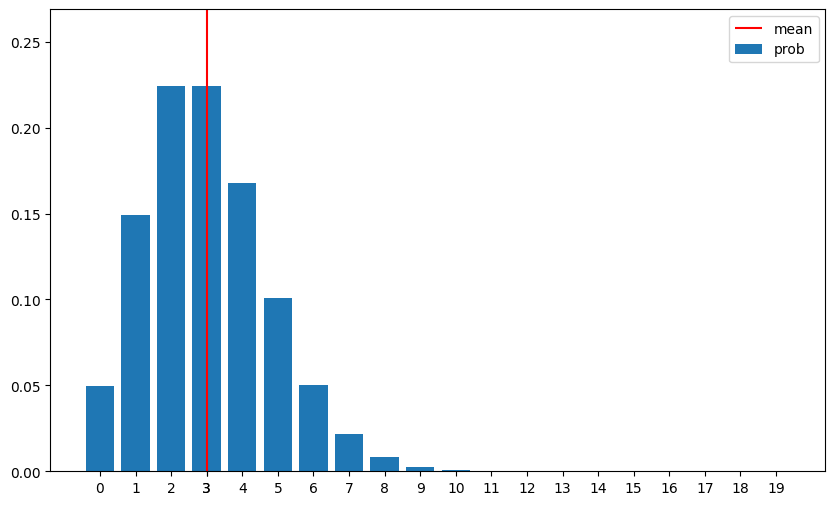

[그림 6-7] 포아송 분포


In [ ]:
plot_prob(X)
print('[그림 6-7] 포아송 분포')

- poisson()
- $λ = 3,\;9,\;15$

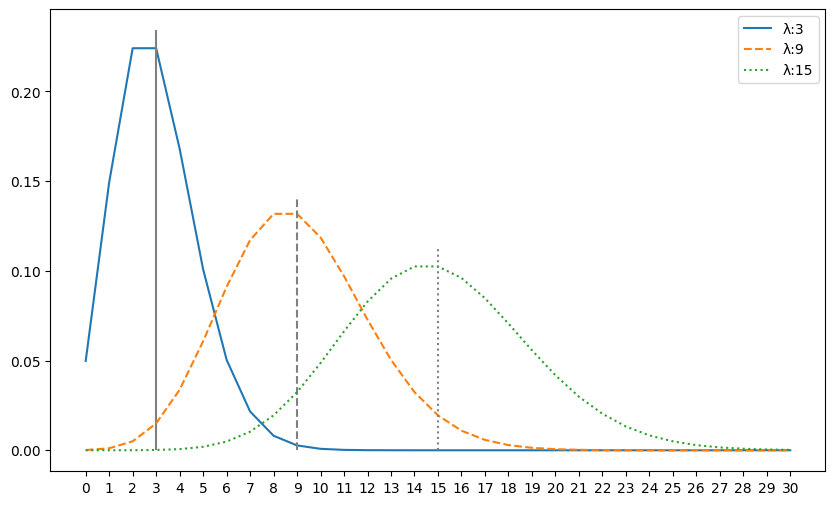

[그림 6-8] 다양한 포아송 분포 (λ = [3, 9, 15])


In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

lams = [3, 9, 15]
x_set = np.arange(31)
for lam, ls in zip(lams, linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'λ:{lam}', ls=ls)
    ax.vlines(lam, 0, rv.pmf(x_set).max()+0.01,
              ls=ls, color='grey')
ax.set_xticks(x_set)
ax.legend()

plt.show()
print('[그림 6-8] 다양한 포아송 분포 (λ = [3, 9, 15])')

- $λ$가 커지면

- 이항분포 수렴
  - $B(n,p), \; np=λ, \; n→∞$ 이면 $Poi(λ)$로 수렴(Poisson limit theorem).
  - https://en.wikipedia.org/wiki/Poisson_limit_theorem

- 포아송 분포 정리

[표 6-4]

|포아송 분포의 정리||
|:-:|:-:|
|파라미터|$λ$|
|취할 수 있는 값|$\{0,1,2,3,\cdots\}$|
|확률함수|$\frac{λ^x}{x!} \, e^{-λ}$|
|기대값|$λ$|
|분산|$λ$|
|scipy.stats|$\text{poisson}(λ)$|